# **Final Project Analysis and Evaluation Code**

#### *Packages*

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
# from statsmodels.tsa.stattools import grangercausalitytests

#### *Load in the data*

In [8]:
df = pd.read_csv('reddit_data_real.csv')

In [15]:
# filter dates 
df['Date'] = pd.to_datetime(df['Date'])
df_date_filter = df[(df['Date'] >= '2022-04-28')]

In [16]:
# find the most popular tickers
df_sub = df_date_filter[["Tickers", "Ticker_count"]]
top_tickers = df_sub.groupby(['Tickers']).sum().sort_values('Ticker_count', ascending=False)
top_tickers1 = top_tickers['Ticker_count'].nlargest(n=100)
top_tickers1.to_csv("top_tickers.csv")

In [23]:
# subset the data using those tickers 
ticker_list = {'SPY', 'ETF', 'AMD', 'TSLA', 'AMZN', 'GME', 'AAPL', 'DCA', 'GOOG', 'QQQ', 'VTI', 'PLTR', 'ARKK', 'MSFT', 'VOO', 'FOMC', 'HOOD', 'AMC', 'ATH', 'NVDA'}
df = df_date_filter.loc[df['Tickers'].isin(ticker_list)]
df.to_csv("final_sentiment_data.csv")

## Descriptive/Explanatory Analysis

#### *Sentiment Score Distribution*

<AxesSubplot:ylabel='Frequency'>

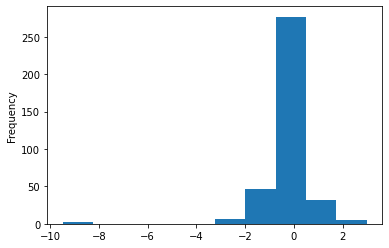

In [73]:
# regular histogram
df['LM_Sentiment_mean'].plot(kind='hist')

#### *Correlation Analysis*

In [28]:
# Subset data
df1 = df[['LM_Sentiment_mean','Score_mean']]

In [31]:
# Calculate covariance, pearson correlation, spearman correlation
Covar = df1.cov()
pearsCorr = df1.corr()
spearCorr = df1.corr(method='spearman')


In [75]:
print(pearsCorr)

                   LM_Sentiment_mean  Score_mean
LM_Sentiment_mean           1.000000    0.031523
Score_mean                  0.031523    1.000000


## Model Creation and Interpretation

#### *Simple Linear Regression*

In [70]:
# built the model using Statsmodel
Y = df['Score_mean']
X = df['LM_Sentiment_mean']

# add a column for the constant
X = sm.add_constant(X)

# running the model
model = sm.OLS(Y, X, missing='drop')
model_result = model.fit()

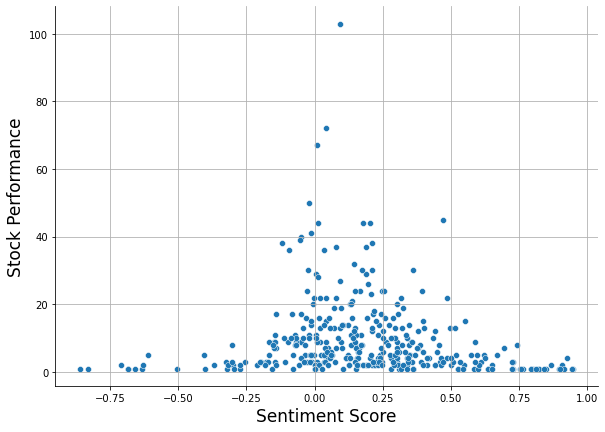

In [69]:
# test the linearity assumption
# sns.scatterplot(x='LM_Sentiment_mean', y='Score_mean', data=df)
scatter = sns.relplot(data=df, x='NLTK_Sentiment_mean', y='Ticker_count', kind='scatter', height=6, aspect=1.4)
scatter.set_axis_labels(x_var="Sentiment Score", y_var="Stock Performance", fontsize=17)
plt.grid()

eval_env: 1


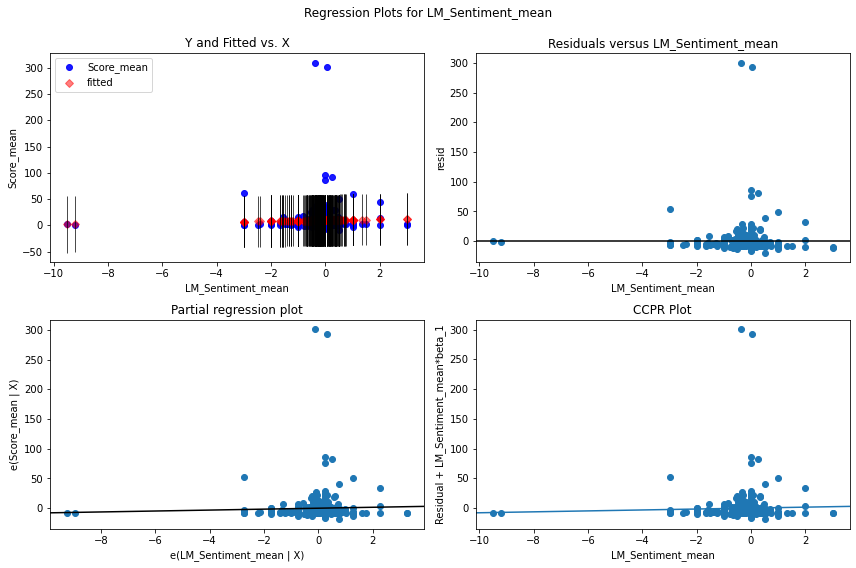

In [37]:
# test the independence and equal variance assumptions
fig = plt.figure(figsize=(12,8)) # define the figure size for the regression plot matrix
fig = sm.graphics.plot_regress_exog(model_result, 'LM_Sentiment_mean', fig=fig) # produce the regression plots


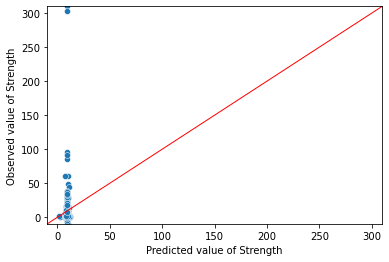

In [46]:
### USE THIS ONE ###
# another test for equal vairance and independence
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color="red", linewidth=1)
plt.show()

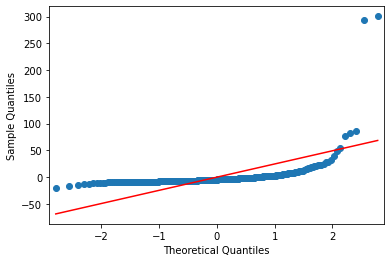

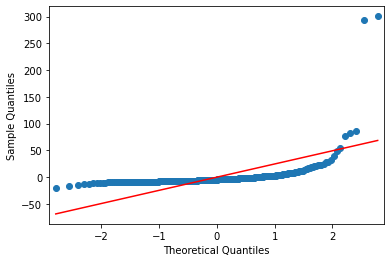

In [38]:
# test the normality assumption
sm.qqplot(model_result.resid, line='s')


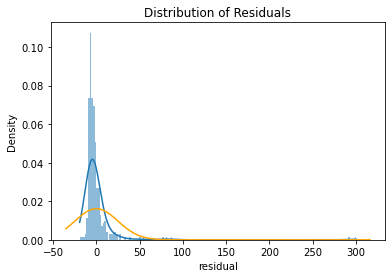

In [80]:
# more normality tests
mu, std = stats.norm.fit(model_result.resid)

fig, ax = plt.subplots()
sns.histplot(x=model_result.resid, ax=ax, stat='density',  linewidth=0, kde=True)
ax.set(title='Distribution of Residuals', xlabel='residual')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
sns.lineplot(x=x, y=p, color='orange', ax=ax)
plt.show()

<AxesSubplot:ylabel='Count'>

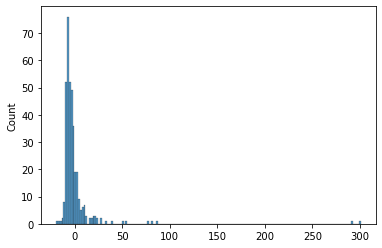

In [43]:
# histogram of residuals
sns.histplot(model_result.resid)


<AxesSubplot:>

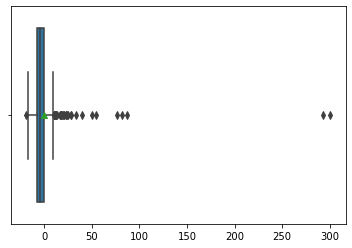

In [44]:
# boxplot of residuals
sns.boxplot(x=model_result.resid, showmeans=True)


In [71]:
# evaluating model parameters, p-value
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:             Score_mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3650
Date:                Thu, 05 May 2022   Prob (F-statistic):              0.546
Time:                        15:58:59   Log-Likelihood:                -1706.4
No. Observations:                 369   AIC:                             3417.
Df Residuals:                     367   BIC:                             3425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.5254      1.33